In [1]:
rm(list=ls())
options(width=160, repr.plot.width=15, repr.plot.height=7) 

# BI-PRS 5. přednáška: Pokročilé regresní metody

## Korekce nesplnění předpokladů

### Multikolinearita

Uvažujme lineární regresní model $$\mathbf Y=\mathbf{X}\beta+\varepsilon,$$

kde $\mathbf Y$ je vektor vysvětlovaných proměnných, $\mathbf X$ matice regresorů, $\beta$ vektor regresních parametrů a $\varepsilon$ vektor i.i.d. odchylek s nulovou střední hodnotou.

Regresní koeficienty $\beta$ odhadujeme pomocí metody nejmenších čtverců jako $\hat\beta=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}$

Designová matice $\mathbf X$ bude pak mít:

- $n$ řádků odpovídající počtu pozorování
- první sloupec odpovídajících absolutnímu členu bude plný jedníček.
- faktorovým regresorům budou příslušet umělé nula-jedničkové sloupce.
- numerickým regresorům přísluší číselné sloupce.
- celkově uvažujme $k$ sloupečků.

Chceme se zabývat vztahy mezi jednotlivými regresory.

**Model s neúplnou hodností**

Uvažujme situaci, kdy matice $\mathbf X$ má hodnost menší než $k$. Pak:

- Sloupce $\mathbf{X}$ jsou lineárně závislé.
- $\mathbf{X}^T\mathbf{X}$ pak není regulární matice a běžný odhad metodou nejmenších čtverců nelze použít. 
- Některý z regresorů by se pak dal vyjádřit jako lineární kombinace ostatních.
- Takový regresor je možné vynechat bez ztráty informace. 

**Model s úplnou hodností**

Uvažujme $h(\mathbf X)=k$. Odhad regresních koeficientů metodou nejmenších čtverců existuje a je jednoznačný. Nicméně pokud budou některé regresory silně korelované, odhady jejich vlivu mohou být zavádějící. Mluvíme pak o **multikolinearitě**. Vztahy mezi regresory chceme identifikovat a regresní model od nich oprostit.

Rozptyl odhadů regresních koeficientů lze vyjádřit jako $$\operatorname{var}\hat\beta=\sigma^2(\mathbf X^T\mathbf X)^{-1}.$$

Pokud jsou regresory korelované, je matice $\mathbf X^T\mathbf X$ špatně podmíněná a rozptyl odhadů příliš vysoký - toho se chceme vyvarovat.

**Korelační matice**

Výběrová korelace mezi dvěma náhodnými veličinami je $$r_{X_j,X_k}=\frac{s_{X_j,X_k}}{s_{X_j}\cdot s_{X_k}},$$
kde
$$\begin{aligned}
s_{X_j,X_k}&=\frac{1}{n-1}\sum_{i=1}^{n}(X_{ji}-\bar{X_j})(X_{ki}-\bar{X_k})\qquad\text{je výběrová kovariance,}\\
s^2_{X_j}&=\frac{1}{n-1}\sum_{i=1}^{n}(X_{ji}-\bar{X_j})^2\qquad\text{je výběrový rozptyl.}
\end{aligned}$$
Matice výběrových korelací sloupců matice $\mathbf X$ nám tak dá přehled, jak silný je vztah mezi kterými regresory. V R ji spočítáme snadno pomocí `cor`.

#### Variance inflation factor

Přehled o tom, jak moc se je který regresor závislý na ostatních, nám dá _faktor zvětšení rozptylu_, (Variance inflation factor, VIF).

Uvažujme j-tý regresor, odpovídající j-tému sloupci matice $\mathbf X$. 

- Modelujme lineární závislost tohoto regresoru na všech ostatních regresorech.
- Nalezněme odhady parametrů regresní závislosti pomocí metody nejmenších čtverců, přičemž vynecháme z matice $\mathbf X$ j-tý sloupec.
- Spočtěme koeficient determinace tohoto regresního modelu, označme jej $R_j$.
- $R_j$ udává podíl variability v j-tém regresoru, vysvětlený ostatními regresory.
- $1-R_j$ se nazývá _tolerance_ a naopak udává podíl variability nevysvětlený ostatními regresory.
- Faktor zvětšení rozptylu pak definujeme jako $$\operatorname{VIF}_j=\frac{1}{1-R_j}.$$ 
- ukazuje, kolikrát se zhorší rozptyl odhadu $\beta_j$ v důsledku korelovanosti j-tého regresoru s ostatními regresory.
- V literatuře se udává, že regresory s $\operatorname{VIF}_j$ vyšším než 5 je dobré z modelu odstranit.
- Metoda funguje dobře pro numerické regresory. Pro kategoriální existuje zobecněná verze GVIF s poněkud složitější interpretací. 
- V **R** můžeme $\operatorname{VIF}$ najít pomocí funkce `vif` z knihovny `car`.

**Příklad:**

Chceme modelovat střední cenu aut v závislosti na technických parametrech - dataset `Cars93` z knihovny `MASS`. Uvažujeme:

- počet válců
- objem motoru
- výkon motoru
- kapacitu nádrže
- počet pasažérů
- délku vozu

In [2]:
library(MASS)
head(Cars93)

Manufacturer Model   Type    Min.Price Price Max.Price MPG.city MPG.highway AirBags            DriveTrain ⋯ Passengers Length Wheelbase Width Turn.circle
1 Acura        Integra Small   12.9      15.9  18.8      25       31          None               Front      ⋯ 5          177    102       68    37         
2 Acura        Legend  Midsize 29.2      33.9  38.7      18       25          Driver & Passenger Front      ⋯ 5          195    115       71    38         
3 Audi         90      Compact 25.9      29.1  32.3      20       26          Driver only        Front      ⋯ 5          180    102       67    37         
4 Audi         100     Midsize 30.8      37.7  44.6      19       26          Driver & Passenger Front      ⋯ 6          193    106       70    37         
5 BMW          535i    Midsize 23.7      30.0  36.2      22       30          Driver only        Rear       ⋯ 4          186    109       69    39         
6 Buick        Century Midsize 14.2      15.7  17.3      22       31          Driver only        Front      ⋯ 6          189    105       69    41         
  Rear.seat.room Luggage.room Weight Origin  Make         
1 26.5           11           2705   non-USA Acura Integra
2 30.0           15           3560   non-USA Acura Legend 
3 28.0           14           3375   non-USA Audi 90      
4 31.0           17           3405   non-USA Audi 100     
5 27.0           13           3640   non-USA BMW 535i     
6 28.0           16           2880   USA     Buick Century

Zjistíme, že jeden z vozů používá Wankelův motor, takže místo počtu válců je uvedeno jen "rotary", což z celé proměnné udělá faktorovou. Obejdeme to překódováním na vhodnou hodnotu:

In [3]:
summary(Cars93$Cylinders)

3      4      5      6      8 rotary 
     3     49      2     31      7      1

In [4]:
Cyl=ifelse(Cars93$Cylinders=="rotary",3,Cars93$Cylinders)

Zkusme odhadnout parametry regresního modelu lineární závislosti:

In [5]:
summary(lm(Price~Cyl+EngineSize+Horsepower+Fuel.tank.capacity+Passengers+Length,data=Cars93))


Call:
lm(formula = Price ~ Cyl + EngineSize + Horsepower + Fuel.tank.capacity + 
    Passengers + Length, data = Cars93)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.633  -2.972  -0.700   2.113  32.108 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -15.55158   10.80316  -1.440    0.154    
Cyl                  1.22873    1.23532   0.995    0.323    
EngineSize          -1.63525    1.47746  -1.107    0.271    
Horsepower           0.11988    0.02560   4.682 1.05e-05 ***
Fuel.tank.capacity   0.36743    0.37639   0.976    0.332    
Passengers          -0.45178    0.90058  -0.502    0.617    
Length               0.08080    0.07388   1.094    0.277    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.018 on 86 degrees of freedom
Multiple R-squared:  0.6372,	Adjusted R-squared:  0.6119 
F-statistic: 25.17 on 6 and 86 DF,  p-value: < 2.2e-16


Předpokládáme, že velká část regresorů bude korelovaná. Spočtěme korelační matici regresorů aplikováním funkce `cor` na `data.frame` s regresory:

In [6]:
round(cor(data.frame(Cyl,Cars93$EngineSize,Cars93$Horsepower,Cars93$Fuel.tank.capacity,Cars93$Passengers,Cars93$Length)),3)

Cyl   Cars93.EngineSize Cars93.Horsepower Cars93.Fuel.tank.capacity Cars93.Passengers Cars93.Length
Cyl                       1.000 0.866             0.769             0.719                     0.330             0.677        
Cars93.EngineSize         0.866 1.000             0.732             0.759                     0.373             0.780        
Cars93.Horsepower         0.769 0.732             1.000             0.712                     0.009             0.551        
Cars93.Fuel.tank.capacity 0.719 0.759             0.712             1.000                     0.472             0.690        
Cars93.Passengers         0.330 0.373             0.009             0.472                     1.000             0.485        
Cars93.Length             0.677 0.780             0.551             0.690                     0.485             1.000

Skutečně, mezi regresory je vysoká korelace. Spočtěme VIF použitím funkce `vif` na nafitovaný regresní model:

In [7]:
library(car)
data.frame(vif(lm(Price~Cyl+EngineSize+Horsepower+Fuel.tank.capacity+Passengers+Length,data=Cars93)))

Loading required package: carData



vif.lm.Price...Cyl...EngineSize...Horsepower...Fuel.tank.capacity...
Cyl                5.011477                                                            
EngineSize         5.967788                                                            
Horsepower         4.567698                                                            
Fuel.tank.capacity 3.870651                                                            
Passengers         2.224240                                                            
Length             2.956629

Objem motoru má nejvyšší VIF, můžeme jej zkusit vynechat. Výsledný model si uložíme.

In [8]:
data.frame(vif(fit_lm<-lm(Price~Cyl+Horsepower+Fuel.tank.capacity+Passengers+Length,data=Cars93)))

vif.fit_lm....lm.Price...Cyl...Horsepower...Fuel.tank.capacity...
Cyl                3.522631                                                         
Horsepower         4.517349                                                         
Fuel.tank.capacity 3.780667                                                         
Passengers         2.224239                                                         
Length             2.395575

Zjevně je objem motoru korelován s počtem válců i výkonem, pro modelování ceny vozu nepřináší nic zásadního navíc.

#### Hřebenová regrese

Pokud je matice $\mathbf X^T \mathbf X$ singulární nebo špatně podmíněná, ale z nějakého důvodu nechceme vynechávat regresory, můžeme pro použití metody nejměnších čtverců místo její inverze použít inverzi s uměle zvýšenými diagonálními prvky:

$$\hat\beta=(\mathbf X^T \mathbf X+\lambda \mathbf I)^{-1}\mathbf X^T \mathbf Y,$$

kde $\mathbf I$ je jednotková matice a $\lambda\geq 0$ _hřebenový parametr_. Jedná se o minimalizaci nejmenších čtverců penalizovaných součtem čtverců parametrů (všech kromě absolutního členu):

$$\min_\beta\left(\sum_{i=1}^n(Y_i-\mathbf X_i\beta)^2+\lambda\sum_{j=1}^p\beta_j^2\right).$$

- Odhady parametrů nejsou nestranné. Čím vyšší hodnota hřebenového parametru, tím více jsou vychýlené směrem k nule.
- Je potřeba najít vhodnou rovnováhu mezi vychýlením a rozptylem parametrů. 
- V **R** lze hřebenovou regresi zavolat více způsoby, např. `ridge` z knihovny `genridge` nebo `lm.ridge` z knihovny `MASS`.
- Doporučuje se regresory standardizovat (odečíst průměry a podělit výběrovými směrodatnýi odchylkami), aby v penalizaci měly všechny parametry stejnou váhu. Procedury toto provedou, parametry pak zobrazí zpět pro původní verzi regresorů.
- Bylo navrženo více možností, jak vybrat nejvhodnější hodnotu $\lambda$, více viz literaturu.

**Příklad:**

Zkusme aplikovat model hřebenové regrese na predikci ceny vozů s využitím hřebenového parametru $\lambda=1$. Porovnáme je s odhady původního lineárního modelu.

In [9]:
fit_rr=lm.ridge(Price~Cyl+Horsepower+Fuel.tank.capacity+Passengers+Length,data=Cars93,lambda=1)
data.frame(fit_lm$coef,coef(fit_rr, scale = FALSE))

fit_lm.coef coef.fit_rr..scale...FALSE.
(Intercept)        -9.74405769 -9.65528031                
Cyl                 0.48349975  0.58769082                
Horsepower          0.11690247  0.11252413                
Fuel.tank.capacity  0.30390968  0.33346568                
Passengers         -0.45225170 -0.53179652                
Length              0.04517926  0.04600682

### Rozdělení reziduí

#### Robustní regrese

- Pokud se v datech vyskytují odlehlá pozorování, můžou významně ovlivnít odhad.
- Diagnostiku reziduí z hlediska odlehlých pozorování jsme už viděli dříve, např. pomocí Cookovy vzdálenosti.
- Metody, které se snaží o poskytování rozumných odhadů bez ohledu na rozdělení vstupních dat, se souhrnně nazývají **robustní**.
- Soustředí se zejména na vyloučení nebo nebo minimalizaci vlivu odlehlých pozorování.
- Hlavní myšlenka je při odhadech nepřikládat vysokou váhu hodnotám v okrajových částech rozdělení.
- Místo minimalizace reziduálního součtu čtverců $\min_\beta\sum_i(Y_i-\mathbf X_i\beta)^2$ minimalizujeme $$\min_\beta\sum_i \rho(Y_i-\mathbf X_i\beta),$$ kde $\rho$ je vhodná diferencovatelná symetrická funkce s globálním minimem v nule. 
- Často se uvažuje např. Huberova funkce $$\rho(x)=\begin{cases}\frac{1}{2}x^2&\text{pro }|x|\leq k\\ k|x|-\frac{1}{2}k^2&\text{jinak,}\end{cases}$$ která do dané vzdálenosti $k$ uvažuje rezidua kvadraticky, ale dále už jen s absolutní hodnotou. Optimální hodnota hranice $k$ byla odvozena jako $1.345\ \sigma$.
- Řešení soustavy rovnic se nazývají _M-odhady_.
- Robustní regresi můžeme aplikovat funkcí `rlm` z knihovny `MASS`.

**Příklad:**

Zkusme zobrazit histogram reziduí regresního modelu závislosti ceny aut na dalších parametrech:

In [10]:
fit_lm=lm(Price~Cyl+Horsepower+Fuel.tank.capacity+Passengers+Length,data=Cars93)
hist(fit_lm$resid)

Vidíme, že některá pozorování jsou odlehlá a jejich vliv na regresory by mohl být příliš velký. Zkusíme použít model robustní regrese se specifikovanou Huberovou funkcí:

In [11]:
fit_rlm=rlm(Price~Cyl+Horsepower+Fuel.tank.capacity+Passengers+Length,data=Cars93,psi=psi.huber)
summary(fit_rlm)
data.frame(fit_lm$coef,coef(fit_rr, scale = FALSE),fit_rlm$coef)


Call: rlm(formula = Price ~ Cyl + Horsepower + Fuel.tank.capacity + 
    Passengers + Length, data = Cars93, psi = psi.huber)
Residuals:
    Min      1Q  Median      3Q     Max 
-12.046  -1.720  -0.273   2.548  34.070 

Coefficients:
                   Value   Std. Error t value
(Intercept)        -5.7089  5.9434    -0.9605
Cyl                 0.2446  0.6518     0.3753
Horsepower          0.1052  0.0160     6.5628
Fuel.tank.capacity  0.5567  0.2341     2.3776
Passengers         -0.6674  0.5668    -1.1775
Length              0.0149  0.0419     0.3551

Residual standard error: 2.746 on 87 degrees of freedom

fit_lm.coef coef.fit_rr..scale...FALSE. fit_rlm.coef
(Intercept)        -9.74405769 -9.65528031                 -5.70890745 
Cyl                 0.48349975  0.58769082                  0.24461881 
Horsepower          0.11690247  0.11252413                  0.10516418 
Fuel.tank.capacity  0.30390968  0.33346568                  0.55665231 
Passengers         -0.45225170 -0.53179652                 -0.66739947 
Length              0.04517926  0.04600682                  0.01486194

#### Normalita dat

Velká část diagnostických metod (analýza rozptylu, věrohodnostní metody) vyžaduje, aby regresní odchylky byly stejně rozdělené a měly normální rozdělení. Normalitu můžeme otestovat např. Shapiro-Wilkovým testem aplikovaným na regresní rezidua.

Pokud normalita splněna není, můžeme 

- odhadnout parametry metodou nejmenších čtverců
- přibližně testovat významnost jednotlivých komponent pomocí T-statistiky (zafunguje CLV).

Některé postupy mají alternativy, které se bez normality obejdou. Pro případ analýzy rozptylu jednoduchého třídění lze použít škálu testů:

- **Wilcoxonův test** shody polohy při třídění do dvou kategorií (alternativa dvouvýběrového t-testu)
- **Friedmannův test** pro opakovaná pozorování v několika stejně zastoupených kategoriích.
- **Kruskal-Wallisův** test pro identifikaci rozdílu mezi několika potenciálně nevyváženými kategoriemi (alternativa one-way Anova)
- **Dunnův test** pro porovnání samotných rozdílů mezi jednotlivými kategoriemi (alternativa k Tukey HSD testu).

Příklady použití probereme na cvičení.

---

## Transformace proměnných

Někdy se může se stát, že model lineární závislosti nestačí:

- závislost má jiný tvar, např. kvadratický, exponenciální nebo logaritmický
- rezidua očividně nemají stejné rozdělení.

V prvním případě se nabízí pracovat s regresory.

- Ve třetí přednášce jsme viděli, že někdy může stačit přidat do modelu polynomiální členy vyšších řádů, čímž bude závislost vysvětlena.
- Vysvětlující proměnné je možné dále transformovat (logaritmovat, odmocňovat, ...). 

Pokud rezidua rostou nebo klesají s vysvětlující proměnnou (což by neměly, předpokládáme shodné rozdělení), může naopak pomoci transformovat vysvětlovanou proměnnou $Y$.

Byla navržena tzv. Box-Coxova transformace
$$Y^{(\lambda)}=\begin{cases}\frac{Y^\lambda-1}{\lambda}&\lambda\neq 0\\ \log(y)&\lambda=0\end{cases}$$
a příslušná funkce, která vyhodnotí věrohodnostní funkci modelu pro všechna $\lambda$.

Transformaci včetně vyhodnocení kandidátských $\lambda$ lze zavolat příkazem `boxcox` z knihovny `MASS`. Interpretace modelu pak ale není vždy přímočará, regresní koeficienty udávají vliv regresorů na transformovanou vysvětlovanou proměnnou.

**Příklad:**

Modelujme závislost ceny vozu (v tisících dolarů) na výkonu (v koňských silách). Použijme lineární regresní model:

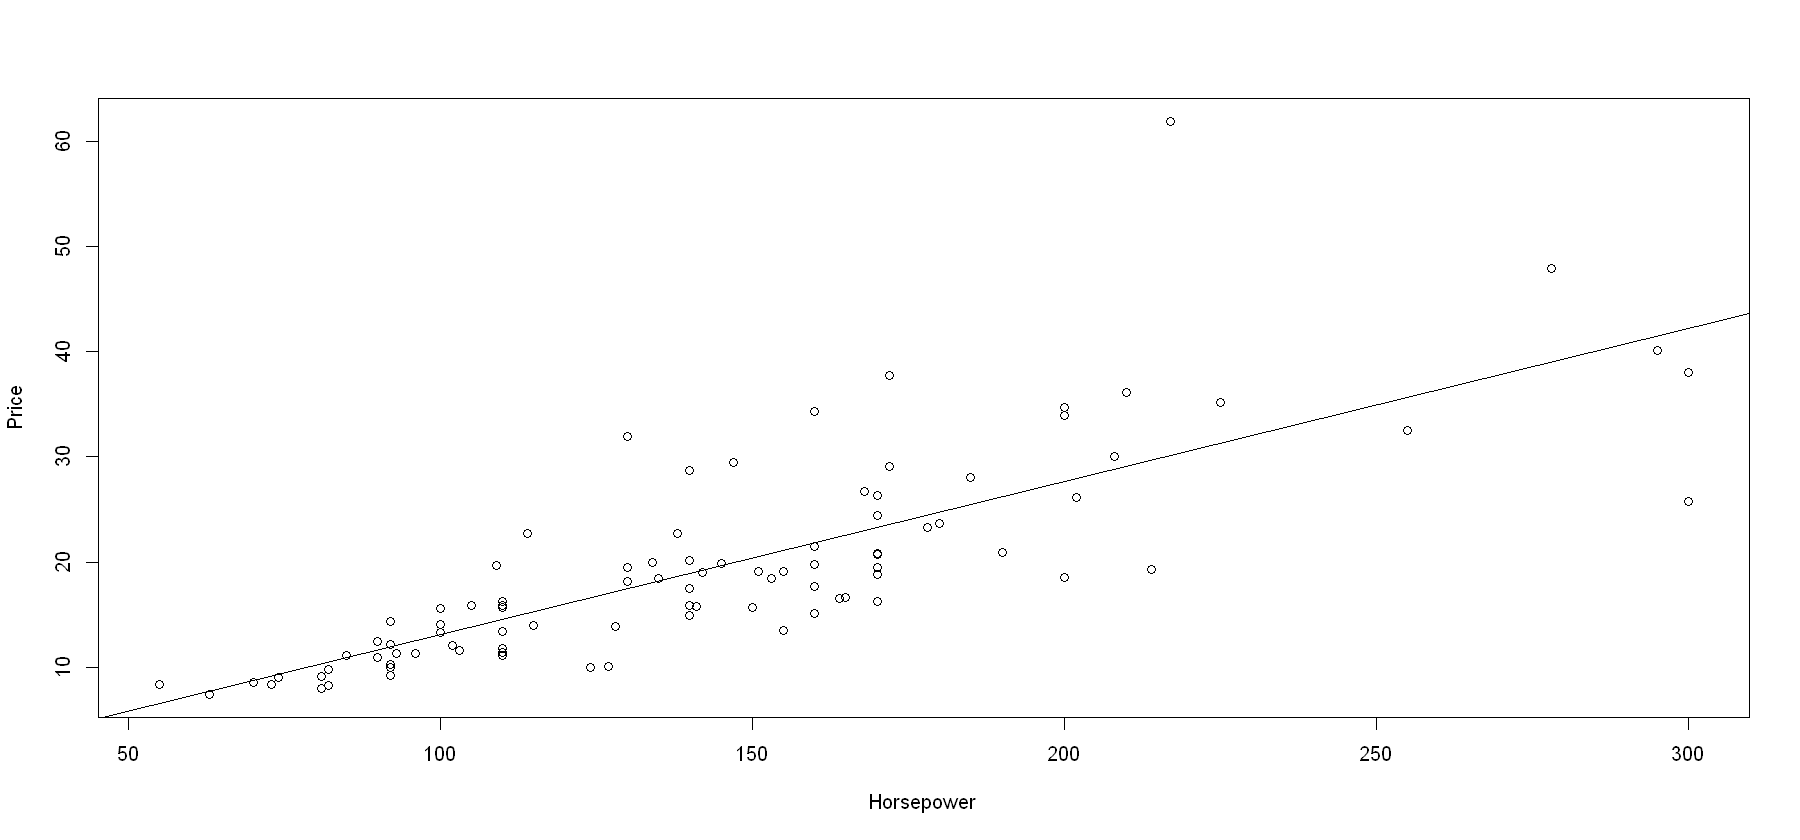

In [12]:
plot(Price~Horsepower,data=Cars93)
abline(lm(Price~Horsepower,data=Cars93))

Rezidua zjevně rostou s vysvětlující proměnnou, nesplňují homoskedasticitu. To můžeme otestovat Breusch-Paganovým testem `bptest` z knihovny `lmtest`:

In [13]:
#install.packages("lmtest")
library(lmtest)
bptest(lm(Price~Horsepower,data=Cars93))

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  lm(Price ~ Horsepower, data = Cars93)
BP = 7.9292, df = 1, p-value = 0.004864


Skutečně, shodný rozptyl reziduí zamítneme. Zkusme zjistit, zda by nepomohlo vhodně transformovat vysvětlovanou proměnnou pomocí Box-Coxovy transformace:

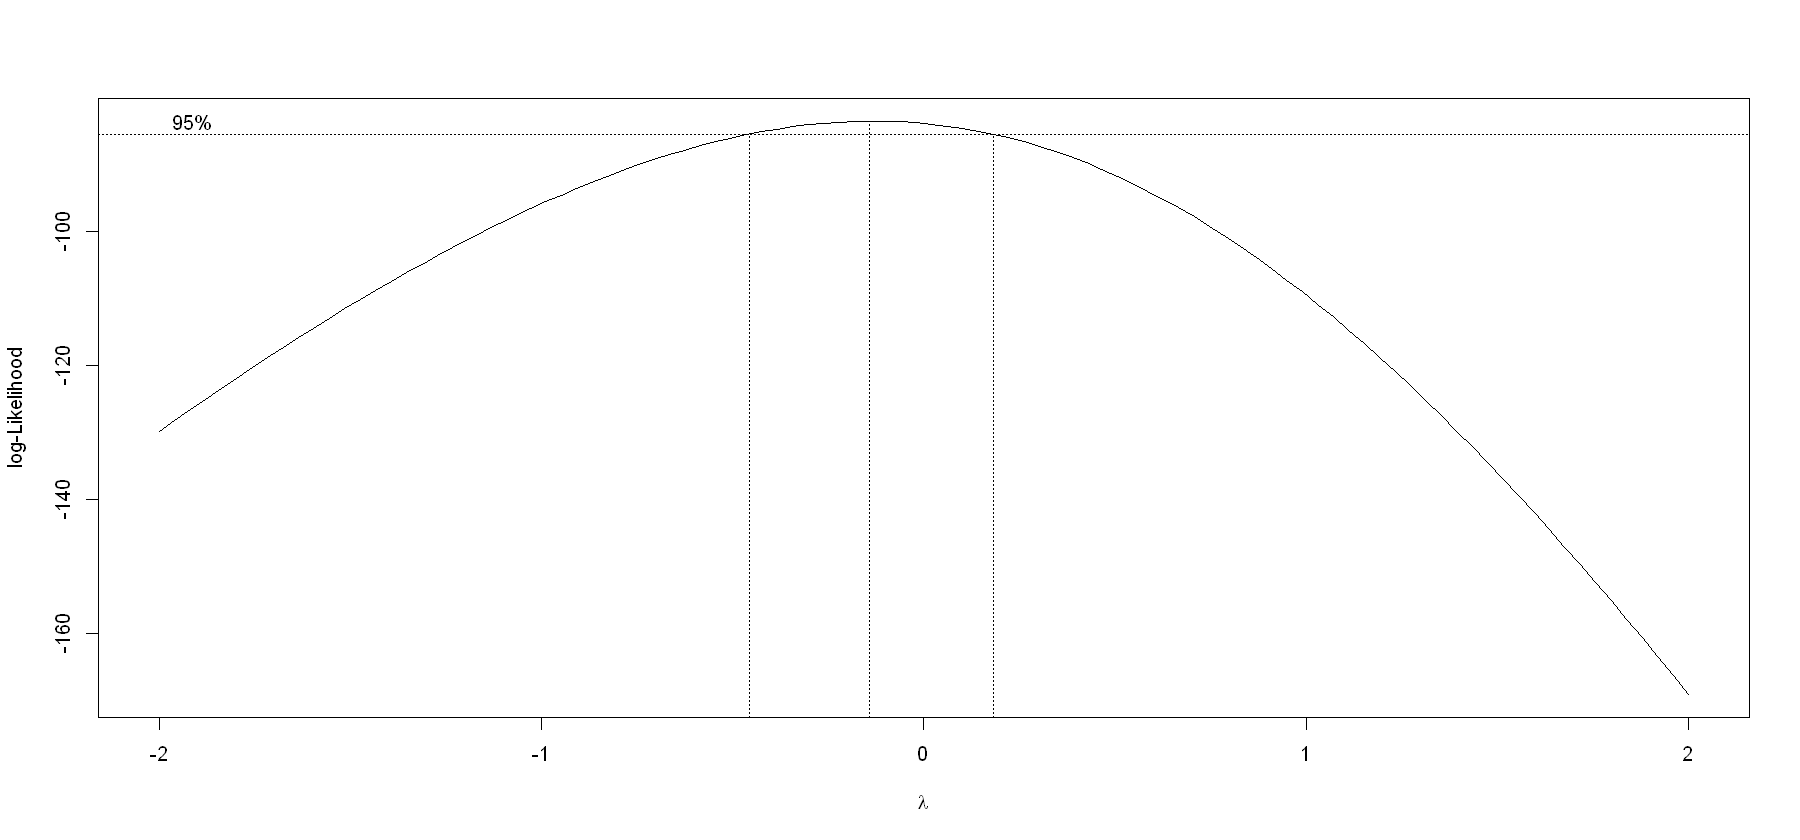

In [14]:
boxcox(lm(Price~Horsepower,data=Cars93))

Funkce nám vrátí hodnotu věrohodnosti v závislosti na hodnotě $\lambda$ - včetně 95% konfidenčního intervalu, ze kterého můžeme zvolit transformační parametr. Speciální místo má hodnota $\lambda=0$, vedoucí na šikovně interpretovatelný model.

#### Logaritmická regrese

Pokud rezidua rostou s (některou) vysvětlující proměnnou, často pomůže zlogaritmovat vysvětlovanou proměnnou. Získáme model
$$\log Y_i=\beta_0+x_{1i}\beta_1+...+x_{ki}\beta_k+\varepsilon_i.$$

V běžném lineárním regresním modelu nám odhad regresního koeficientu $\hat\beta_j$ dá informaci, o kolik se zvýší v průměru $Y$, pokud příslušný j-tý regresor vzroste o jedna.

U log-lineárního modelu aplikováním exponenciely na obě strany rovnice získáme 
$$\begin{aligned}Y_i&=\exp(\beta_0+x_{1i}\beta_1+...+x_{ki}\beta_k+\varepsilon_i)\\
                    &=e^{\beta_0}\cdot e^{x_{1i}\beta_1}\cdot...\cdot e^{x_{ki}\beta_k}\cdot e^{\varepsilon_i}.\end{aligned}$$
                    
Takže závislost $Y$ na regresorech je multiplikativní. Když se zvýší j-tý regresor o jedna, vysvětlovaná proměnná $Y$ vzroste v průměru $e^{\hat\beta_j}$-krát.

Pozor, pokud budou všechny regresory nulové, získáme $\operatorname E Y_i=\operatorname E( e^{\beta_0}\cdot e^{\varepsilon_i})= e^{\beta_0}\cdot \operatorname E e^{\varepsilon_i}$, přičemž v případě normality reziduí je $\operatorname E e^{\varepsilon_i}=e^{\sigma^2/2}$, kde $\sigma^2$ můžeme odhadnout pomocí reziduálního rozptylu $s^2$.

**Příklad:**

Zkusme použít model závislosti logaritmu ceny vozu na výkonu motoru:

In [15]:
fit_log=lm(log(Price)~Horsepower,data=Cars93)
summary(fit_log)


Call:
lm(formula = log(Price) ~ Horsepower, data = Cars93)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73316 -0.16831 -0.01999  0.14305  0.73621 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.8357418  0.0787413   23.31   <2e-16 ***
Horsepower  0.0071593  0.0005147   13.91   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2586 on 91 degrees of freedom
Multiple R-squared:  0.6801,	Adjusted R-squared:  0.6766 
F-statistic: 193.4 on 1 and 91 DF,  p-value: < 2.2e-16


Odhadnuté regresní koeficienty mají přímou interpretaci:

- Auto s nulovým výkonem stojí v průměru $e^{\beta_0}\cdot e^{s^2/2}=e^{1.835}\cdot e^{0.2586^2/2}=6.478$ tisíc dolarů.
- Při zvýšení výkonu o jednu koňskou sílu roste cena v průměru $e^{\beta_1}=e^{0.0071593}=1.0072$ krát (cca o 0.72%).

Vykreslíme rezidua a otestujeme homoskedasticitu. Situace je sice lepší, ale pořád ne ideální.

Můžeme například dále logaritmovat obě proměnné, interpretace parametrů pak ale je složitější.

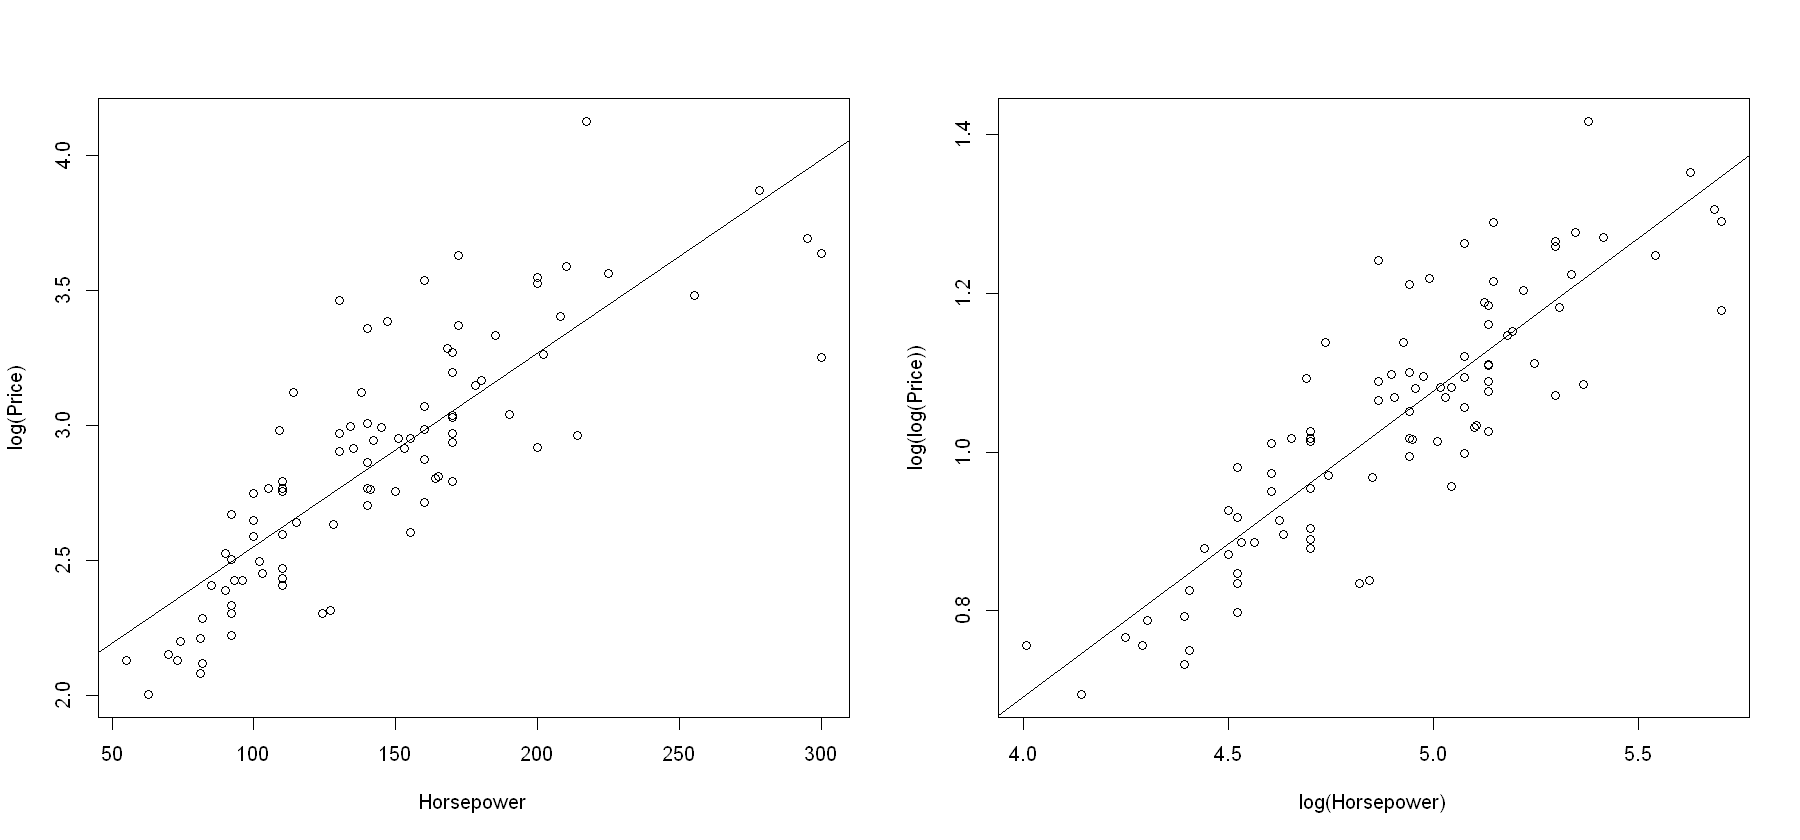

In [16]:
par(mfrow=c(1,2))

plot(log(Price)~Horsepower,data=Cars93)
abline(fit_log)

plot(log(log(Price))~log(Horsepower),data=Cars93)
abline(lm(log(log(Price))~log(Horsepower),data=Cars93))

In [17]:
bptest(fit_log)
bptest(lm(log(log(Price))~log(Horsepower),data=Cars93))


	studentized Breusch-Pagan test

data:  fit_log
BP = 6.5254, df = 1, p-value = 0.01063



	studentized Breusch-Pagan test

data:  lm(log(log(Price)) ~ log(Horsepower), data = Cars93)
BP = 1.6775, df = 1, p-value = 0.1953


---

## Zobecněné lineární modely (GLM)

Pomocí lineární regrese jsme se snažili modelovat střední hodnotu vysvětlované proměnné jako lineární funkci regresorů. Od střední hodnoty se vysvětlovaná proměnná lišila pouze o i.i.d. gaussovský šum.

V něterých případech můžeme chtít zkoumat veličiny, které nejsou s regresory svázány lineárně přímo, ale skrz vhodnou funkci.

Uvažujme vliv regresorů v lineárním tvaru $\mathbf X \beta$ na šikovnou transformaci střední hodnoty zkoumané proměnné.

Pokud rozdělení Y patří do tzv. exponenciálního systému hustot, je možné závislost modelovat obdobně.

### Situace GLM

Uvažujme $Y_1,...,Y_n$ nezávislé veličiny, jejichž rozdělení závisí na regresorech $x_{i1},...,x_{ik}$ prostřednictvím parametrů $\beta_1,...,\beta_k$ následovně:

- Nechť hustota $Y_i$ má tvar $$f(y_i|\mathbf x_i)=\exp\left(\frac{y_i\theta_i-b(\theta_i)}{\gamma}+c(y_i,\gamma)\right),$$ kde $\theta_i$ jsou _kanonické parametry_, $\gamma$ je _disperzní paramter_,  a $b$ a $c$ jsou reálné funkce.
- Pro střední hodnotu $Y_i$ platí $\mu_i:=\operatorname{E}Y_i=b^\prime(\theta_i)$
- Existuje známá ryze monotónní **linková funkce** $g$, pro kterou platí $g(\mu_i)=\mathbf x_i\beta$.

**Postup odhadu:**

- Stanovíme, do jaké rodiny rozdělení patří vysvětlovaná proměnná, podle toho vyjádříme hustotu a věrohodnost $L(\theta_i,\gamma)=\prod_i f(y_i|\mathbf x_i)$.
- Zvolíme vhodnou linkovou funkci, skrz kterou jsou spojeny regresory a její střední hodnota. Často se uvažuje tzv. _kanonický link_ $g(\mu_i)=\theta_i.$
- Odhady regresních parametrů získáme metodou maximální věrohodnosti. 
- Odhady ve většině případů nelze vyjádřit explicitně, používá se nejčastěji iterační vážená metoda nejmenších čtverců (IWLS).

**Poznámka:**

Pro původní model lineární regrese:

- linková funkce je identitou,
- $\theta_i=\mu_i=\mathbf x_i\beta$
- $\gamma=\sigma^2$

**Tvrzení:**

- Vedle regresního modelu s $g(\mu_i)=\mathbf x_i\beta$ můžeme uvažovat i tzv. saturovaný model, kde by každé pozorování mělo vlastní parametr. 
- Označíme-li log-věrohodnost saturovaného modelu jako $l^*$ a log-věrohodnost regresního modelu jako $l(\hat\beta)$, pak statistika $$D(\hat\beta)=2(l^*-l(\hat\beta))$$ se nazývá _škálovaná deviance_.
- Pokud by původní model měl $k$ regresorů a uvažovali bychom v něm podmodel s $r$ regresory, odhadli v něm parametry jako $\hat\beta_p$, pak statistika $$LR=D(\hat\beta_p)-D(\hat\beta)=2(l(\hat\beta)-l(\hat\beta_p))$$ má za platnosti podmodelu $\chi^2$ rozdělení s $k-r$ stupni volnosti a je možné jí použít pro testování podmodelu.

**Pozorování:**

- Zobecněné lineární modely jsou založeny na věrohodnosti. Můžeme tak pro různé nafitované modely spočítat a porovnávat AIC resp. BIC.

### Logistická regrese

Uvažujme situaci, kdy:

- Zkoumaná proměnná $Y$ má alternativní rozdělení $\operatorname{Alt}(p)$, tedy nabývá hodnot 1 nebo 0 s pravděpodobnostmi $p$ a $1-p$, se střední hodnotou $\mu=p$.
- Diskrétní hustota pak má tvar $$\begin{aligned}f(y)&=p^y(1-p)^{1-y}=e^{\log (p^y(1-p)^{1-y})}=e^{y\log p+ (1-y)\log(1-p)}\\
&=e^{y(\log p-\log(1-p))+ \log(1-p)}=\exp(y\log \frac{p}{1-p}+\log(1-p)).\end{aligned}$$
- Jedná se o exponenciální tvar s $\theta=\log\frac{p}{1-p}$, $b(\theta)=\log(1+e^{\theta})$ a $\gamma=1$.


**Poznámky:**

- $\frac{p}{1-p}$ se nazývá **šance**, že $Y=1$ (odds).
- Transformace pravděpodobnosti $\log \frac{p}{1-p}$ se nazývá logit.
- Rozmyslete, že když $p\in(0,1)$, pak $\frac{p}{1-p}\in(0,\infty)$ a $\log\frac{p}{1-p}\in \Re$.

**Regresní model**

- Mějme nyní $Y_1$,...,$Y_n$ nezávislé alternativní s pravděpodobnostmi (a zároveň středními hodnotami) $p_i=:\mu_i$.
- Uvažujeme-li linkovou funkci ve tvaru $$\mathbf x_i\beta=g(\mu_i)=\text{logit}(p_i)=\log\frac{p_i}{1-p_i},$$ získáváme model **logistické regrese** s logitovým linkem.
- Inverzní transformací získáme šance ve tvaru
$$\frac{p_i}{1-p_i}=e^{\mathbf x_i\beta}$$
- a pravděpodobnosti ve tvaru
$$p_i=\frac{e^{\mathbf x_i\beta}}{1+e^{\mathbf x_i\beta}}.$$
- Po dosazení odhadů $\hat\beta$ získáme odhady šancí i pravděpodobností.
- Rozmysleme, že pokud se hodnota j-tého regresoru zvýší o jedna, znamená to, že se šance na $Y=1$ zvýší o $e^{\beta_j}$ (odds ratio).

**Pozorování:**

- Obdobně můžeme postupovat, kdyby vysvětlovaná proměnná nebyla alternativní, ale binomická. Jako vstup pak kromě počtu úspěchů $Y_i$ potřebujeme i počet pokusů $n_i$.
- Někdy se místo logitového linku uvažuje probitový $$\text{probit(p)}=\Phi^{-1}(p),$$ kde $\Phi$ je distribuční funkce standardního normálního rozdělení. Potom $p_i=\Phi(x_i\beta)$.

**Příklad:**

Chceme zkoumat, zda u osob používajících kreditní kartu došlo k defaultu, tedy neschopnosti splácet dluhy. Jako vysvětlující proměnné uvažujeme:

- indikátor, zda se jedná o studenta
- průměrný zůstatek konta kreditní karty (=velikost dluhu)
- průměrný příjem

Jedná se o dataset `Default` knihovny `ISLR`. Data načteme a shrneme:

In [18]:
#install.packages("ISLR")
library(ISLR)
summary(Default)

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

Vidíme, že jen u 333 osob z 10000 došlo k defaultu. Podle čeho lze default predikovat? Zobecněný lineární model zavoláme funkcí `glm` se specifikovaným parametrem rodiny rozdělení a linkovou funkcí:

In [19]:
fit_glm=glm(default~student+balance+income,family=binomial(link=logit),data=Default)
summary(fit_glm)


Call:
glm(formula = default ~ student + balance + income, family = binomial(link = logit), 
    data = Default)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
studentYes  -6.468e-01  2.363e-01  -2.738  0.00619 ** 
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


Získáme odhady regresních parametrů, jejich směrodatné odchylky a statistiky a p-hodnoty tzv. Waldova testu nulovosti regresních koeficientů.

Navíc můžeme vidět hodnotu Deviance a Akaikeho informačního kritéria.

Můžeme interpretovat vliv regresních koeficientů na poměr šancí:

- pokud je osoba student, šance na default se sníží $e^{-6.468e-01}=0.52371$ krát
- s každým dolarem dluhu navíc se šance na default zvyšuje $e^{5.737e-03}=1.005753$ krát
- s každým dolarem příjmu šance na default zvyšuje $e^{3.033e-06}=1.000003$ krát, tento vliv je nevýznamný.

Můžeme uvažovat podmodel bez vlivu příjmů a provnat, zda je významně horší pomocí deviance. Tu získáme příkazem `anova` s oběma modely jako argumenty. Vidíme, že odebráním vlivu příjmů se nic zásadního nestane:

In [20]:
fit_glm_bez=glm(default~student+balance,family=binomial(link=logit),data=Default)
anova(fit_glm_bez,fit_glm,test="Chisq")

Resid. Df Resid. Dev Df Deviance  Pr(>Chi) 
1 9997      1571.682   NA        NA        NA
2 9996      1571.545    1 0.1367695 0.7115139

### Poissonovská regrese

Uvažujme situaci, kdy:

- Zkoumaná proměnná $Y$ má Poissonovo rozdělení $\operatorname{Poisson}(\lambda)$, tedy nabývá nezáporných celočíselných hodnot s pravděpodobnostmi $$\operatorname P(Y=k)=\frac{\lambda^k}{k!}e^{-\lambda},\quad k\in \mathcal N_0$$
Střední hodnota je $\lambda$.
- Diskrétní hustota pak má tvar $$f(y)=\exp(y\log \lambda-\lambda-\log y!)$$
- Jedná se o exponenciální tvar s $\theta=\log\lambda$, $b(\theta)=e^{\theta}$ a $\gamma=1$.

**Regresní model**

- Mějme nyní $Y_1$,...$Y_n$ nezávislé poissonovské s parametry (a zároveň středními hodnotami) $\lambda_i=:\mu_i$.
- Uvažujeme-li logaritmickou linkovou funkci ve tvaru $$\mathbf x_i\beta=g(\mu_i)=\log\lambda_i,$$ získáváme model **poissonovské regrese** s logaritmickým linkem.
- Inverzní transformací získáme parametry
$$\lambda=e^{\mathbf x_i\beta}$$
- Po dosazení odhadů $\hat\beta$ získáme odhady šancí i pravděpodobností.
- Rozmysleme, že pokud se hodnota j-tého regresoru zvýší o jedna, znamená to, že se střední hodnota zvýší $\exp(\beta_j)$-krát.

Další příklady si ukážeme na cvičení.